In [13]:
import torch
import matplotlib.pyplot as plt

# Set default data type to float64 for higher precision
torch.set_default_dtype(torch.float64)
# Set the number of threads used by PyTorch (16 in this case, adjust as needed)
torch.set_num_threads(16)

# matplotlib settings
plt.rcParams["text.usetex"] = False  # Disable LaTeX support
plt.rcParams["lines.markersize"] = 3  # Set the default marker size
plt.rcParams["font.size"] = 18  # Set default font size

# Define grid dimensions and create tensors for Nx and Ny
Lx = 2  # Length in the x-direction
Ly = 1  # Length in the y-direction
Nx = 40 * Lx + 1  # Number of points in the x-direction
Ny = 80 * Ly + 1  # Number of points in the y-direction
shape1 = (Nx, Ny)  # Store grid shape
Nx = torch.tensor(Nx)  # Convert Nx to a tensor
Ny = torch.tensor(Ny)  # Convert Ny to a tensor

# Calculate the spacing between points (step size) in both x and y directions
dx = (Lx / (Nx - 1))
dy = (Ly / (Ny - 1))

# Create the grid points using meshgrid
X = torch.meshgrid(torch.linspace(0, Lx, Nx), torch.linspace(0, Ly, Ny), indexing='ij')
# Reshape and concatenate to get a 2D tensor of grid coordinates
X = torch.cat((X[0].reshape(-1, 1), X[1].reshape(-1, 1)), dim=1)

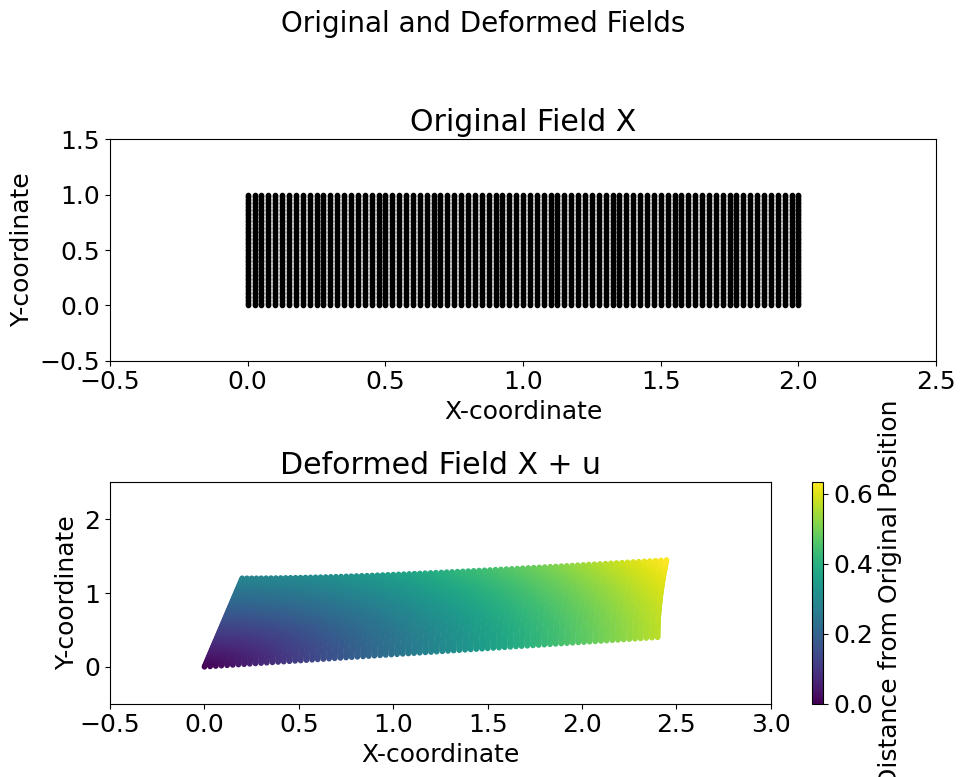

In [14]:
# Define a new nonlinear displacement field u
r = torch.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
u = torch.stack((0.2 * r, 0.2 * r), dim=1)

# Calculate deformed positions by adding the displacement field to the original grid points
X_deformed = X + u

# Calculate Euclidean distance of each point from its original position
distance = torch.norm(u, dim=1)

# Create the figure and add a main title
plt.figure(figsize=(10, 8))
plt.suptitle("Original and Deformed Fields", fontsize=20)

# Plot Original field
plt.subplot(2, 1, 1)
plt.scatter(X[:, 0].numpy(), X[:, 1].numpy(), color='black', marker='o')
plt.title("Original Field X")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xlim(-0.5, Lx + 0.5)
plt.ylim(-0.5, Ly + 0.5)

# Plot Deformed field with colors based on Euclidean distance
plt.subplot(2, 1, 2)
plt.scatter(X_deformed[:, 0].numpy(), X_deformed[:, 1].numpy(), c=distance.numpy(), cmap='viridis', marker='o')
plt.colorbar(label="Distance from Original Position")
plt.title("Deformed Field X + u")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xlim(-0.5, Lx + 1)
plt.ylim(-0.5, Ly + 1.5)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
